In [143]:
from sympy.abc import x,y,z
from sympy import Matrix, solve, exp, simplify, factor, prod
from sympy.tensor.array import derive_by_array, Array

from sympy import init_printing

init_printing()

In [2]:
f = exp(x**2+y**2+z**2) - x**4 -y**6 -z**6
gradient = derive_by_array(f, [x,y,z])  # Use %time to see how fast this computes
hessian  = Matrix( [derive_by_array(gradient, a) for a in [x,y,z]])

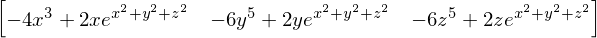

In [3]:
gradient

In [4]:
gradient.subs({x:0,y:0,z:0})

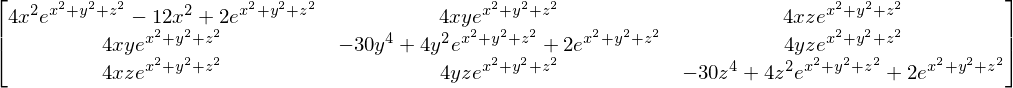

In [5]:
hessian

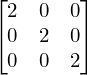

In [6]:
hessian.subs({x:0,y:0,z:0})

In [7]:
def f(x): return x**2-2

In [8]:
import numpy as np, matplotlib.pyplot as plt
plt.xkcd();

In [9]:
def search(f,fd,x0,steps):
    outputx=[x0,x0]
    outputy=[0,f(x0)]
    for step in range(steps):
        xn = x0-f(x0)/fd(x0)
        outputx.append(xn)
        outputx.append(xn)
        outputy.append(0)
        outputy.append(f(xn))
        x0 = xn
    return (outputx, outputy)
        

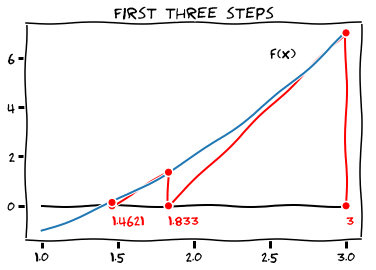

In [10]:
ox,oy = search(f,lambda x: 2*x,3,2)
# print(ox)

x=np.linspace(1,3)
plt.figure()
plt.plot([1,3],[0,0],'k')
plt.plot(ox,oy,'r')
plt.plot(x,f(x))
plt.plot(ox,np.zeros_like(ox),'or')
plt.plot(ox,[f(t) for t in ox],'or')
plt.text(3,-0.75,'3',color='r')
plt.text(1.83,-0.75,'1.833',color='r')
plt.text(1.4621,-0.75,'1.4621',color='r')
plt.text(2.5,6,'f(x)')
plt.title('First three steps')
plt.show()

[1.46, 1.46, 1.4149315068493151, 1.4149315068493151, 1.4142137445176965, 1.4142137445176965, 1.4142135623731067, 1.4142135623731067]
[0, 0.13159999999999972, 0, 0.002031169074873329, 0, 5.151827648930407e-07, 0, 3.2862601528904634e-14]


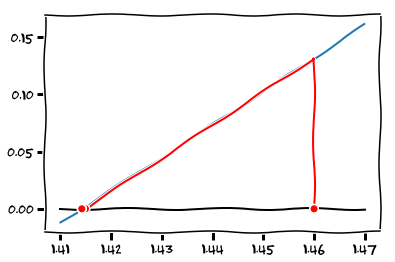

In [11]:
ox,oy = search(f,lambda x: 2*x,1.46,3)
print(ox)
print(oy)
x=np.linspace(1.41,1.47)
plt.figure()
plt.plot([1.41,1.47],[0,0],'k')
plt.plot(x,f(x))
plt.plot(ox,oy,'r')
plt.plot(ox,np.zeros_like(ox),'or')
# plt.text(3,-0.75,'3',color='r')
# plt.text(1.83,-0.75,'1.833',color='r')
# plt.text(1.4621,-0.75,'1.4621',color='r')
# plt.text(2.5,6,'f(x)')
plt.show()

In [12]:
def search_output(f,fd,x0,steps):
    output = '\\begin{tabular}{|c|c|c|} \\hline \n'
    output += '$n$ & $x_n$ & $f(x_n)$ \\\\ \hline \hline \n'
    output += ('$0$ & $%1.15f$ & $%1.4E$ \\\\ \\hline \n' % (x0, f(x0)))
#     outputx=[x0,x0]
#     outputy=[0,f(x0)]
    for step in range(steps):
        xn = x0-f(x0)/fd(x0)
#         outputx.append(xn)
#         outputx.append(xn)
#         outputy.append(0)
#         outputy.append(f(xn))
        x0 = xn
        output += '$%d$ & $%1.15f$ & $%1.4E$ \\\\ \\hline \n' % (step+1,xn,f(xn)) 
                      
    
    output += r'\end{tabular}'
    return output

In [13]:
print(search_output(f,lambda x: 2*x, 3,7))

\begin{tabular}{|c|c|c|} \hline 
$n$ & $x_n$ & $f(x_n)$ \\ \hline \hline 
$0$ & $3.000000000000000$ & $7.0000E+00$ \\ \hline 
$1$ & $1.833333333333333$ & $1.3611E+00$ \\ \hline 
$2$ & $1.462121212121212$ & $1.3780E-01$ \\ \hline 
$3$ & $1.414998429894803$ & $2.2206E-03$ \\ \hline 
$4$ & $1.414213780047198$ & $6.1568E-07$ \\ \hline 
$5$ & $1.414213562373112$ & $4.7518E-14$ \\ \hline 
$6$ & $1.414213562373095$ & $-4.4409E-16$ \\ \hline 
$7$ & $1.414213562373095$ & $4.4409E-16$ \\ \hline 
\end{tabular}


In [14]:
def f(x): return 1-1/x

In [15]:
ox,oy=search(f, lambda x: 1/x**2,3,1)

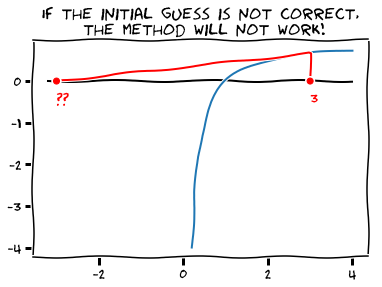

In [16]:
x=np.linspace(0.2,4)
plt.figure()
plt.plot([-3.2,4],[0,0],'k')
plt.plot(x,f(x))
plt.plot(ox[:-1],oy[:-1],'r')
plt.plot(ox,np.zeros_like(ox),'or')
plt.text(3,-0.5,'3',color='r')
plt.text(-3,-0.5,'??',color='r')
# plt.text(1.4621,-0.75,'1.4621',color='r')
# plt.text(2.5,6,'f(x)')
plt.title("If the initial guess is not correct,\n the method will not work!")
plt.show()

In [19]:
def f(x): return np.sign(x)*abs(x)**(0.5)

In [34]:
ox,oy = search(f, lambda x: abs(x)**(-0.5)/2,1,2)

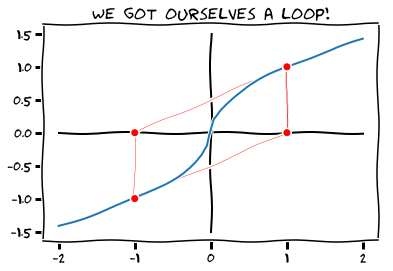

In [41]:
x = np.linspace(-2,2)
plt.figure()
plt.plot([-2,2],[0,0],'k')
plt.plot([0,0],[-1.5,1.5],'k')
plt.plot(ox,oy,'r',lw=0.4)
plt.plot(x,f(x))
plt.plot(ox,oy,'ro')
plt.title('We got ourselves a loop!')
plt.show()

In [42]:
def f(x): return abs(x)**0.5

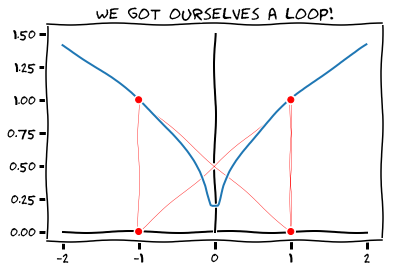

In [45]:
ox,oy = search(f, lambda x: np.sign(x)*abs(x)**(-0.5)/2, 1, 2)

x = np.linspace(-2,2)
plt.figure()
plt.plot([-2,2],[0,0],'k')
plt.plot([0,0],[0,1.5],'k')
plt.plot(ox,oy,'r',lw=0.4)
plt.plot(x,f(x))
plt.plot(ox,oy,'ro')
plt.title('We got ourselves a loop!')
plt.show()

In [77]:
def f(x): return 9 - 4/(x-7)

In [120]:
ox,oy = search(f, lambda x: 4/(x-7)**2, 7.87, 5)

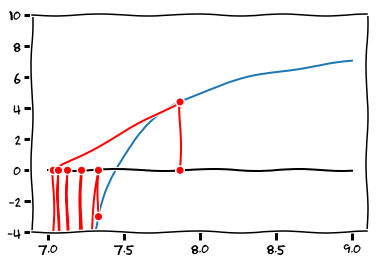

In [121]:
x = np.linspace(7.2,9)

plt.figure()
plt.plot(x,f(x))
plt.ylim(-4,10)
plt.plot([7,9],[0,0],'k')
plt.plot(ox,oy,'r')
plt.plot(ox,oy,'ro')
plt.show()

In [126]:
g=9-4/(y-7)

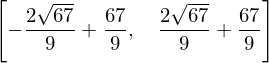

In [142]:
solve(y-g/g.diff())

In [145]:
nwtn = prod([y-a for a in solve(y-g/g.diff())])

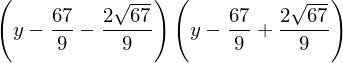

In [146]:
nwtn

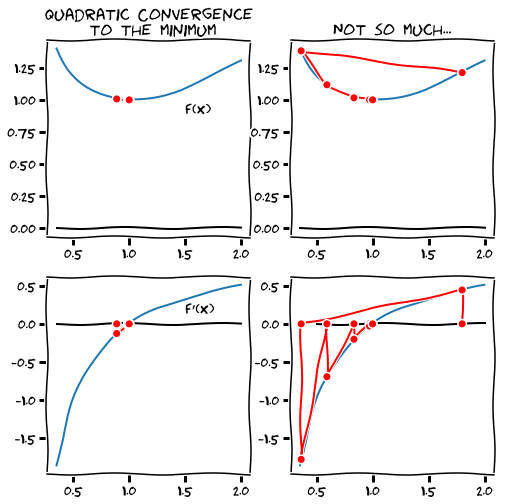

In [195]:
def f(x): return 1-1/x
def g(x): return x-np.log(x)

ox1,oy1 = search(f, lambda x: 1/x**2, 0.888, 5)
ox2,oy2 = search(f, lambda x: 1/x**2, 1.8, 5)

x = np.linspace(0.35,2)

plt.figure(figsize=(8,8))
plt.subplot(223)
plt.plot(x,f(x))
plt.text(1.5,0.15,"f'(x)")
plt.plot([0.35,2],[0,0],'k')
plt.plot(ox1,oy1,'r')
plt.plot(ox1,oy1,'ro')
plt.subplot(224)
plt.plot(x,f(x))
plt.plot([0.5,2],[0,0],'k')
plt.plot(ox2,oy2,'r')
plt.plot(ox2,oy2,'ro')
plt.subplot(221)
plt.title('Quadratic Convergence\n to the minimum')
plt.text(1.5,0.9,'f(x)')
plt.plot(x,g(x))
plt.plot([0.35,2],[0,0],'k')
plt.plot(ox1,[g(k) for k in ox1],'r')
plt.plot(ox1,[g(k) for k in ox1],'ro')
plt.subplot(222)
plt.title('Not so much...')
plt.plot(x,g(x))
plt.plot([0.35,2],[0,0],'k')
plt.plot(ox2,[g(k) for k in ox2],'r')
plt.plot(ox2,[g(k) for k in ox2],'ro')
plt.show()